# Visualise the gridded G. truncatulinoides Data
- using the DIVA web interface to interpolate the G.trunc data (exported in notebook 1) 
- import that data back into python as a netcdf file

> https://ec.oceanbrowser.net/emodnet/diva.html#

- need: `data/external/Gtruncs_DIVA.nc`

In [1]:
# preamble# Preamble
import numpy as np
import pandas as pd
import xarray as xr
import cartopy as ctpy
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
# load data
T = xr.open_dataset('../data/external/GLODAPv2.2016b.temperature.nc')
S = xr.open_dataset('../data/external/GLODAPv2.2016b.salinity.nc')
Si = xr.open_dataset('../data/external/GLODAPv2.2016b.silicate.nc')
O = xr.open_dataset('../data/external/GLODAPv2.2016b.oxygen.nc')
CO2 = xr.open_dataset('../data/external/GLODAPv2.2016b.TCO2.nc')

GTS = xr.open_dataset('../data/external/Gtruncs_DIVA.nc')

# load non-gridded forcens data
df = pd.read_csv('../data/tables/ForCenS_with_GLODAP.csv')


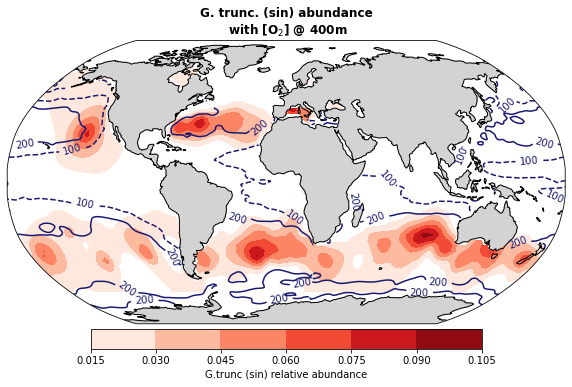

In [130]:
### Plot GTS contours with Oceanographic Variables ###
crs = ctpy.crs.Robinson()
# Plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection=crs)
ax.add_feature(ctpy.feature.COASTLINE)
ax.add_feature(ctpy.feature.LAND,facecolor='lightgray')

gts = ax.contourf(GTS['lon'],GTS['lat'],GTS['G_truncat_sin_abundance'],transform=ctpy.crs.PlateCarree(),cmap='Reds',levels=[0.015,0.03,0.045,0.06,0.075,0.09,0.105])
cs =ax.contour(O['lon'],O['lat'],O['oxygen'].sel(depth_surface=11),transform=ctpy.crs.PlateCarree(),levels=[100,200],colors='midnightblue',linestyles=['dashed','solid'])
ax.clabel(cs, cs.levels, inline=True,fmt='%i', fontsize=10)

fig.colorbar(gts,orientation='horizontal',pad=0.01,fraction=0.036,label='G.trunc (sin) relative abundance');

ax.set_title('G. trunc. (sin) abundance\n with [O$_2$] @ 400m',fontweight='bold');

plt.savefig('../G_trunc_sin_O2_400.png',bbox_inches='tight',dpi=300)

(array([5.86710e+04, 7.61030e+04, 8.79790e+04, 1.49795e+05, 3.53981e+05,
        1.53593e+05, 1.49098e+05, 5.28970e+04, 1.21800e+04, 1.25000e+02]),
 array([ -0.49743176,  45.43037844,  91.35818863, 137.28599882,
        183.21380901, 229.14161921, 275.0694294 , 320.99723959,
        366.92504978, 412.85285997, 458.78067017]),
 <BarContainer object of 10 artists>)

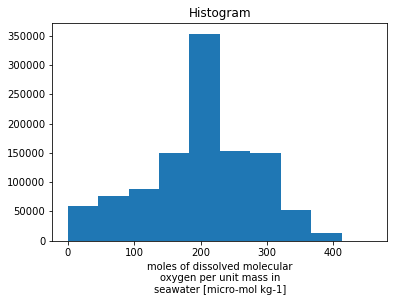

In [33]:
O['oxygen'].plot()
